In [3]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential

# data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [30]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
# convert categorical values into dummy/indicator values
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state = 42)

In [39]:
# number of features in our input data
numFeatures = trainX.shape[1]

# number of classes our data points can be in
numClasses = trainY.shape[1]

# Placeholder
# 'None' means TensorFlow should not expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features
y = tf.placeholder(tf.float32, [None, numClasses]) # Answer matrix for 3 classes

In [40]:
# Multiply the 4-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes
# Set model weights and bias
W = tf.Variable(tf.zeros([4,3])) # 4 dimensional input and 3 classes
b = tf.Variable(tf.zeros([3])) # 3 dimensional output
W

<tf.Variable 'Variable_1:0' shape=(4, 3) dtype=float32_ref>

In [48]:
# Randomly sample from a normal distribution with standard deviation 0.01
weights = tf.Variable(tf.random_normal([numFeatures, numClasses],
                                      mean=0,
                                      stddev=0.01,
                                      name="weights"))

bias = tf.Variable(tf.random_normal([1,numClasses],
                                   mean=0,
                                   stddev=0.01,
                                   name="bias"))

𝑦̂ =𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑊𝑋+𝑏)

tf.nn.sigmoid = $(\frac{1}{1+e^{-Wx}})$

In [52]:
# weight times features matrix multiplication operation
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
# summation of the weighted features and a bias term
add_bias_OP = tf.add(apply_weights, bias, name ="add_bias")
# application of a sigmoid function
activation_OP = tf.nn.sigmoid(add_bias, name="activation")

In [54]:
# defining the cost function

numEpochs = 700
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                         global_step=1,
                                         decay_steps=trainX.shape[0],
                                         decay_rate=0.95,
                                         staircase=True)

#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-y, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [55]:
# create a tensorflow session
sess = tf.Session()

# initialize the weights and biases
init_OP = tf.global_variables_initializer()

# initialize all tensorflow variables in tf
sess.run(init_OP)

In [57]:
# keep track of model's efficiency over time
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(y,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [59]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, y: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, y: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                y: testY})))

step 0, training accuracy 0.636364, cost 33.0899, change in cost 33.0899
step 10, training accuracy 0.606061, cost 29.9217, change in cost 3.16823
step 20, training accuracy 0.646465, cost 28.0168, change in cost 1.9049
step 30, training accuracy 0.646465, cost 26.4077, change in cost 1.60902
step 40, training accuracy 0.646465, cost 25.0694, change in cost 1.33838
step 50, training accuracy 0.646465, cost 23.9619, change in cost 1.10745
step 60, training accuracy 0.646465, cost 23.0436, change in cost 0.918301
step 70, training accuracy 0.646465, cost 22.2772, change in cost 0.766371
step 80, training accuracy 0.646465, cost 21.6321, change in cost 0.645184
step 90, training accuracy 0.646465, cost 21.0836, change in cost 0.548464
step 100, training accuracy 0.666667, cost 20.6127, change in cost 0.470907
step 110, training accuracy 0.666667, cost 20.2044, change in cost 0.408281
step 120, training accuracy 0.666667, cost 19.8471, change in cost 0.35729
step 130, training accuracy 0.6

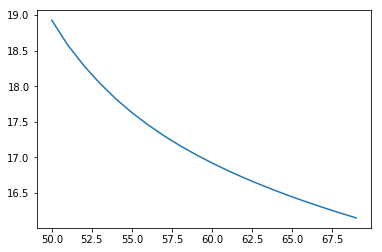

In [61]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()